# Laboratório 2

Neste laboratório, vamos aplicar um pouco da teoria e prática que vimos ao longo da segunda semana da disciplina.

A ideia principal é que vamos trabalhar um pouco mais com os quatro classificadores que já estudamos até agora: KNN, *Naive Bayes*, Árvore de Decisão e Regressão Logística.

Assim como no Laboratório 01, vamos utilizar o conjunto de dados ``College``, disponível [aqui](https://www.statlearning.com/resources-python).

Só para lembrar, o conjunto de dados contém informações sobre várias faculdades e universidades dos Estados Unidos. O significado de cada informação não é essencial para este exercício. Mas alguns exemplos de informações contidas no conjunto de dados são:

- `Private`: Indica se a instituição é pública ou privada
- `Apps`: Número de aplicações recebidas
- `Accept`: Número de aplicações aceitas
- `Enroll`: Número de novos alunos matriculados
- `Top10perc`: Percentual de novos alunos do top 10% de turmas do ensino médio
- `Top25perc`: Percentual de novos alunos do top 25% de turmas do ensino médio
- ...

## Obtenção dos dados

Para obter o conjunto de dados, execute o comando abaixo. O arquivo ``College.csv`` será diretamente acessível por meio desse *notebook*.

**Observação:** caso a sessão do *notebook* seja interrompida, será necessário baixar o conjunto de dados novamente.

In [ ]:
!wget https://www.statlearning.com/s/College.csv

--2025-01-28 22:45:30--  https://www.statlearning.com/s/College.csv
Resolving www.statlearning.com (www.statlearning.com)... 198.185.159.144, 198.49.23.145, 198.185.159.145, ...
Connecting to www.statlearning.com (www.statlearning.com)|198.185.159.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe064464c2528214f6bde/1610604644365/College.csv [following]
--2025-01-28 22:45:31--  https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe064464c2528214f6bde/1610604644365/College.csv
Resolving static1.squarespace.com (static1.squarespace.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connecting to static1.squarespace.com (static1.squarespace.com)|151.101.0.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74924 (73K) [text/csv]
Saving to: ‘College.csv.14’

College.csv.14      100%[===================>]  73.17K  --.-KB/s    in 0.003s  

**ATENÇÃO:** você não deve remover ou adicionar células no restante deste *notebook*.

Sempre escreva suas respostas nas células indicadas!

## Leitura e Preparação dos Dados [Não vale pontos, mas é necessário]

Repita a Parte I do Laboratório 01. Ou seja, prepare o conjunto de dados seguindo as instruções dos Itens 1.1 a 1.7 daquele Laboratório.

In [3]:
# Escreva sua resposta aqui
import pandas as pd

read_csv = pd.read_csv('College.csv')
read_csv.rename(columns = {'Unnamed: 0':'College'}, inplace = True)
read_csv.set_index('College', inplace = True)
read_csv['Good School'] = read_csv['Top10perc'].apply(lambda x: 1 if x > 25 else 0)

y = read_csv['Good School'].copy()

read_csv.drop(columns = ['Top10perc', 'Top25perc', 'Good School'], inplace = True)

read_csv['Private'] = read_csv['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

read_csv


,Private,Apps,Accept,Enroll,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,0,2197,1515,543,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,1,1959,1805,695,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,1,2097,1915,695,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


Ao final da preparação, o *Data Frame* deve se parecer com o mostrado abaixo.

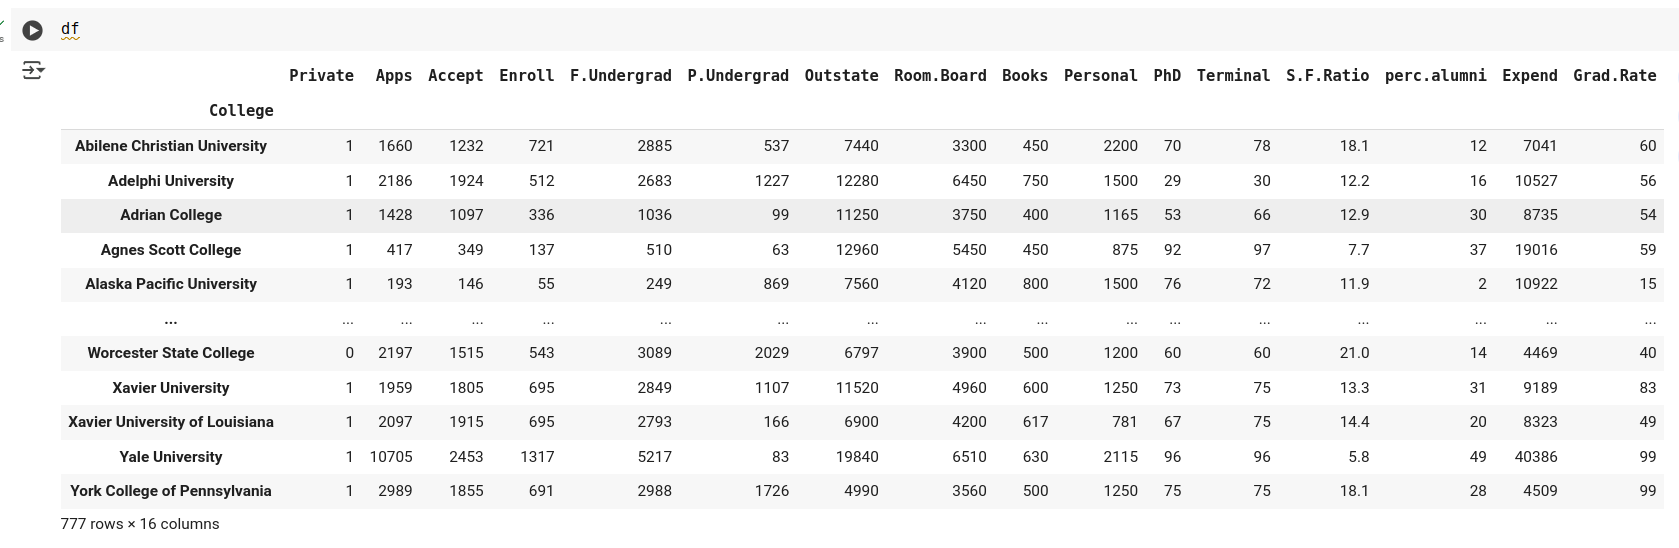

## Parte 1: Comparando os Classificadores [40 pontos - Todos os itens têm o mesmo valor]

Assim como no Laboratório 01, a tarefa de predição aqui será prever a variável `y` em função dos dados contidos no *Data Frame* resultante na parte anterior do laboratório.

Ou seja, o objetivo é criar um modelo para classificar se uma instituição de ensino é uma `Good School` ou não.

### Divisão em conjuntos de treinamento e teste.

Divida o conjunto de dados em porções distintas para treinamento e avaliação do classificador.

25% do conjunto de dados deve ser retido para testes.

Essa mesma divisão deverá ser utilizada no restante do laboratório.

O Código fornecido abaixo realiza essa separação para você e não deve ser alterado.

In [5]:
# não modifique esse código.

from sklearn.model_selection import train_test_split

X = read_csv.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Item 1.1

Use os Classificadores [KNN](https://scikit-learn.org/1.6/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Árvore de Decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) e [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) no conjunto de dados acima. Ou seja:
1. Treine os quatro classificadores em `X_train` e `y_train`. Nesse momento, você **não** deve aplicar nenhuma transformação nos dados (e.g. padronização ou reescala). Além disso, não forneça nenhum parâmetro aos classificadores (todos os hiperparâmetros devem ser os padrões da `scikit-learn`);
2. Use cada um dos classificadores para prever os rótulos dos elementos do conjunto de teste, `X_test`.
3. Calcule e imprima a acurácia dos quatro classificadores no conjunto de teste.

In [ ]:
# Escreva sua resposta aqui
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

knn_accuracy, dt_accuracy, nb_accuracy, lr_accuracy

C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7487179487179487,
 0.7589743589743589,
 0.7589743589743589,
 0.7282051282051282)

### Item 1.2

Repita a mesma tarefa do Item 1.1.

No entanto, dessa vez, você deve aplicar a transformação por reescala nos dados. Lembre, o `scaler` deve ser ajustado ao conjunto de treinamento e posteriormente aplicado ao conjunto de teste.

Após isso, proceda como no Item 1.1 (treine e teste os classificadores e imprima a acurácia no conjunto de teste).

**Atenção:**
- O conjunto de treinamento transformado deve ser armazenado na variável `X_train_scaled`.
- Similarmente, o conjunto de teste transformado, deve ser armazenado na variável `X_test_scaled`.

In [ ]:
# Escreva sua resposta aqui
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_pred = nb.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, nb_pred)

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)

knn_accuracy, dt_accuracy, nb_accuracy, lr_accuracy

(0.7743589743589744,
 0.7538461538461538,
 0.7743589743589744,
 0.7794871794871795)

### Item 1.3

Com base nos resultados dos Itens 1.1 e 1.2, há alguma evidência inicial de que a transformação por reescala faz diferença?

Se sua resposta for sim, quais classificadores tiveram resultados próximos nos dois experimentos e quais tiveram resultados muito diferentes?

**Resposta:** Sim, a transformação por reescala fez diferença. O classificador Árvore de Decisão teve resultados próximos nos dois experimentos, enquanto os demais classificadores tiverem resultado melhor após a transformação.

## Parte 2 - Impacto dos Hiperparâmetros [50 pontos - Todos os itens têm o mesmo valor]

Na segunda parte do Laboratório, vamos estudar um pouco sobre o impacto de alguns hiperparâmetros dos algoritmos vistos.

### Item 2.1 - KNN

Varie o $k$ do KNN de 1 a 30 (ou seja $k \in \{1, 2, 3, \dots, 30\}$).

Para cada $k$, treine um KNN, em `X_train_scaled`. Use o classificador treinado para obter os rótulos dos elementos em `X_test_scaled` e `y_train`. Calcule a acurácia do classificador no conjunto de teste.

Faça um gráfico $k \times \text{acurácia}$. Ou seja, no eixo $X$ deve-se ter o $k$ do KNN e no eixo $Y$ deve-se ter a acurácia do KNN quando $k$ é utilizado como hiperparâmetro.

**Observação:** Não é necessário fazer uma nova divisão de conjuntos de treinamento e teste. Também não é necessário ajustar um novo `scaler`. Os conjuntos de treinamento e teste (`X_train_scaled` e `X_teste_scaled`) devem ser reutilizados da Parte 1.

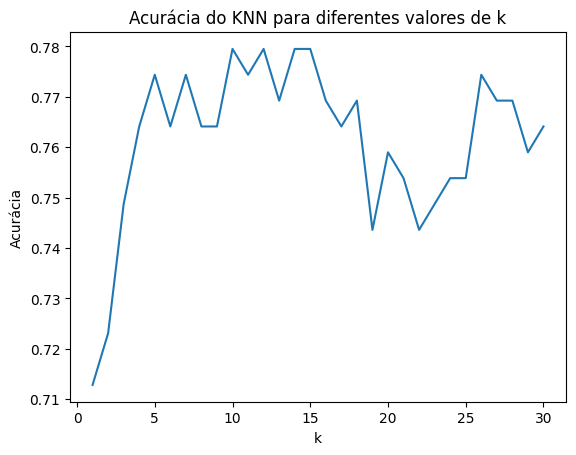

In [ ]:
# Escreva sua resposta aqui
import matplotlib.pyplot as plt

k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    knn_pred = knn.predict(X_test_scaled)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    accuracies.append(knn_accuracy)

plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Acurácia')
plt.title('Acurácia do KNN para diferentes valores de k')
plt.show()


### Item 2.2 - KNN

Com base na Figura gerada no Item 2.1, há algum valor (ou valores) de $k$ que leva o classificador a ter um desempenho melhor?



**Resposta:** Sim, o valor de k entre 10 a 15 leva o classificador a ter um desempenho melhor.

### Item 2.3 - Regressão Logística

Varie o $C$ da Regressão Logística. Comumente, para isso, utiliza-se valores espaçados exponencialmente. Assim, utilize a função [`logspace`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html) da biblioteca `numpy` para criar 50 valores espaçados exponencialmente de 0.01 a 1000. O código para gerar esses valores já está na resposta.

Para cada $C$ treine uma Regressão Logística, em `X_train_scaled` e `y_train`. Use o classificador treinado para obter os rótulos dos elementos em `X_test_scaled`. Calcule a acurácia do classificador no conjunto de teste.

Faça um gráfico $C \times \text{acurácia}$. Ou seja, no eixo $X$ deve-se ter o $C$ da Regressão Logística e no eixo $Y$ deve-se ter a acurácia do Regressão Logística quando $C$ é utilizado como hiperparâmetro.

**Dica:** Para uma melhor visualização, coloque o eixo $X$ da figura em escala logarítmica.
Para isso, veja a função [xscale](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html). Veja um exemplo [aqui](https://www.geeksforgeeks.org/matplotlib-pyplot-xscale-function-in-python/).

**Observação:** Não é necessário fazer uma nova divisão de conjuntos de treinamento e teste. Também não é necessário ajustar um novo `scaler`. Os conjuntos de treinamento e teste (`X_train_scaled` e `X_teste_scaled`) devem ser reutilizados da Parte 1.

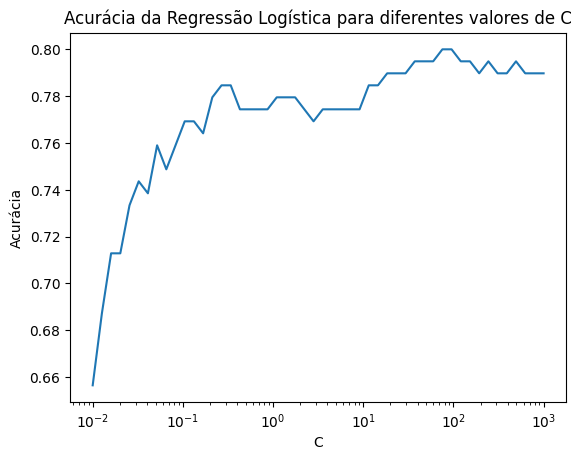

In [ ]:
import numpy as np

c_range = np.logspace(-2, 3, num = 50)

# Escreva sua resposta aqui
accuracies = []

for c in c_range:
    lr = LogisticRegression(C = c)
    lr.fit(X_train_scaled, y_train)
    lr_pred = lr.predict(X_test_scaled)
    lr_accuracy = accuracy_score(y_test, lr_pred)
    accuracies.append(lr_accuracy)

plt.plot(c_range, accuracies)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Acurácia')
plt.title('Acurácia da Regressão Logística para diferentes valores de C')
plt.show()




### Item 2.4 - Regressão Logística

Com base na Figura gerada no Item 2.3, há algum valor (ou valores) de $C$ que leva o classificador a ter um desempenho melhor?

**Resposta:** Sim, quanto maior o valor de C melhor foi o desempenho do classificador.

### Item 2.5 - Árvore de Decisão

Varie o a profundidade máxima da Árvore de decisão de 1 a 30.

Para cada profundidade máxima (parâmetro `max_depth`), treine uma Árvore de Decisão, em `X_train_scaled`. Use o classificador treinado para obter os rótulos dos elementos em `X_test_scaled` e `y_train`. Calcule a acurácia do classificador no conjunto de teste.

Faça um gráfico Profundidade Máxima $\times~\text{acurácia}$. Ou seja, no eixo $X$ deve-se ter a Profundidade Máxima da Árvore de Decisão e no eixo $Y$ deve-se ter a acurácia do KNN quando tal profundidade é utilizada como hiperparâmetro.

**Observação:** Não é necessário fazer uma nova divisão de conjuntos de treinamento e teste. Também não é necessário ajustar um novo `scaler`. Os conjuntos de treinamento e teste (`X_train_scaled` e `X_teste_scaled`) devem ser reutilizados da Parte 1.

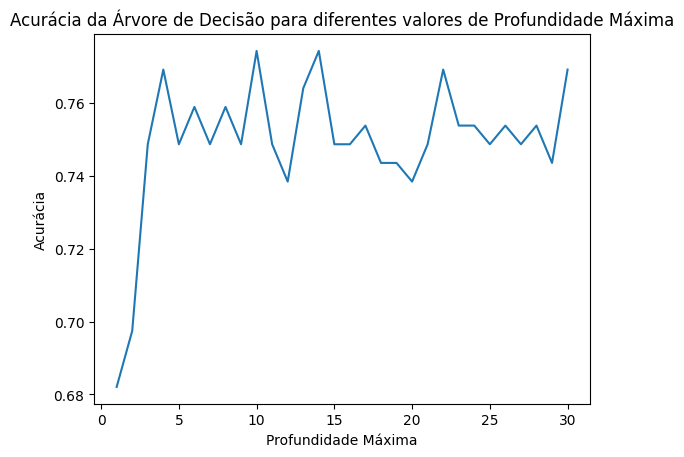

In [ ]:
# Escreva sua resposta aqui
max_depth_values = range(1, 31)
accuracies = []

for max_depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth = max_depth)
    dt.fit(X_train_scaled, y_train)
    dt_pred = dt.predict(X_test_scaled)
    dt_accuracy = accuracy_score(y_test, dt_pred)
    accuracies.append(dt_accuracy)

plt.plot(max_depth_values, accuracies)
plt.xlabel('Profundidade Máxima')
plt.ylabel('Acurácia')
plt.title('Acurácia da Árvore de Decisão para diferentes valores de Profundidade Máxima')
plt.show()


### Item 2.6 - Árvore de Decisão

Com base na Figura gerada no Item 2.5, há algum valor (ou valores) para a profundidade máxima da árvore de decisão que leva o classificador a ter um desempenho melhor?

**Resposta:** Sim, 10 e 30

### Item 2.7 - Gaussian Naive Bayes

Varie o parâmetro `var_smoothin` do classificador *Gaussian Naive Bayes*. Comumente, para isso, utiliza-se valores espaçados exponencialmente. Assim, utilize a função [`logspace`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html) da biblioteca `numpy` para criar 100 valores espaçados exponencialmente de $10^{-11}$ a $10^{11}$. O código para gerar esses valores já está na resposta.

Para cada valor de `var_smoothin` treine um *Gaussian Naive Bayes*, em `X_train_scaled` e `y_train`. Use o classificador treinado para obter os rótulos dos elementos em `X_test_scaled`. Calcule a acurácia do classificador no conjunto de teste.

Faça um gráfico `var_smoothin` $\times~\text{acurácia}$. Ou seja, no eixo $X$ deve-se ter o `var_smoothin` do *Gaussian Naive Bayes* e no eixo $Y$ deve-se ter a acurácia do *Gaussian Naive Bayes* quando `var_smoothin` é utilizado como hiperparâmetro.

**Dica:** Para uma melhor visualização, coloque o eixo $X$ da figura em escala logarítmica.
Para isso, veja a função [xscale](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html). Veja um exemplo [aqui](https://www.geeksforgeeks.org/matplotlib-pyplot-xscale-function-in-python/).

**Observação:** Não é necessário fazer uma nova divisão de conjuntos de treinamento e teste. Também não é necessário ajustar um novo `scaler`. Os conjuntos de treinamento e teste (`X_train_scaled` e `X_teste_scaled`) devem ser reutilizados da Parte 1.

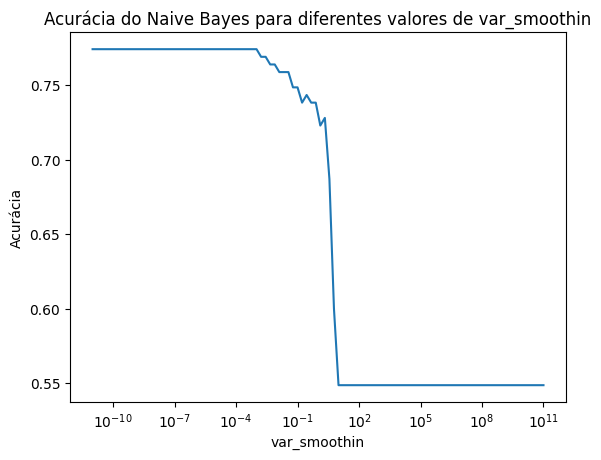

In [ ]:
vsmt_range = np.logspace(-11, 11, num = 100)

# Escreva sua resposta aqui
accuracies = []

for var_smoothin in vsmt_range:
    nb = GaussianNB(var_smoothing = var_smoothin)
    nb.fit(X_train_scaled, y_train)
    nb_pred = nb.predict(X_test_scaled)
    nb_accuracy = accuracy_score(y_test, nb_pred)
    accuracies.append(nb_accuracy)

plt.plot(vsmt_range, accuracies)
plt.xscale('log')
plt.xlabel('var_smoothin')
plt.ylabel('Acurácia')
plt.title('Acurácia do Naive Bayes para diferentes valores de var_smoothin')
plt.show()


### Item 2.8 - Gaussian Naive Bayes

Com base na Figura gerada no Item 2.7, há algum valor (ou valores) para o parâmetro `var_smothing` do *Gaussian Naive Bayes* que leva o classificador a ter um desempenho melhor?

**Resposta:** Sim. a Eficácia do classificador cai drasticamente a partir de 10^2 e fica constante a partir dele.

## Parte 3 [10 pontos - Todos os itens têm o mesmo valor]

### Item 3.1

Com base nos resultados da Parte 2, repita o experimento do Item 1.2. No entanto, agora, ao invés de utilizar os hiperparâmetros fornecidos pela `scikit-learn`, use os valores que você identificou como apropriados para os classificadores. Ou seja:
- Para o KNN, use o $k$ identificado no Item 2.2;
- Para a Regressão Logística, use o $C$ identificado no Item 2.4;
- Para a Árvore de Decisão, use a Profundidade Máxima identificada no Item 2.6;
- Para o *Gaussian Naive Bayes*, use o `var_smoothing` identificado no Item 2.8.

**Observação:** esse exercício é apenas para fins de prática. Essa não é uma metodologia adequada para escolha de hiperparâmetros. Isso será abordado mais adiante no curso.

In [ ]:
# Escreva sua resposta aqui
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)

dt = DecisionTreeClassifier(max_depth = 30)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)

# var_smoothing = 10 ^ - 10 
nb = GaussianNB(var_smoothing = 10 ** -10)
nb.fit(X_train_scaled, y_train)
nb_pred = nb.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, nb_pred)

lr = LogisticRegression(C = 10 ** 2)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)

knn_accuracy, dt_accuracy, nb_accuracy, lr_accuracy

(0.7794871794871795, 0.7487179487179487, 0.7743589743589744, 0.8)

### Item 3.2

Comente os resultados. Os hiperparâmetros fornecidos fizeram diferença significativa para algum classificador (Comparando os resultados do Item 1.2 com os do Item 3.1)?

Em outras palavras, é razoável dizer que os hiperparâmtros fornecidos pela `scikit-learn` são adequados ao conjunto de dados?



**Resposta:** Não fizeram diferença significativa. Os hiperparâmetros fornecidos pela `scikit-learn` são adequados ao conjunto de dados.